In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from src.models.TrainEvaluate import TrainEvaluate
from src.utils.plotting import getPositionalBoundaries
from src.visualisation.SummaryModels import SummaryModels

def printTrack(track, project_dir, speed=True):
    
    lat_min, lat_max, lon_min, lon_max = getPositionalBoundaries(train.validation_set.data_info['binedges'], zoom=8)
    plt.rcParams.update({'font.size': 18})

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    img = mpimg.imread(project_dir / 'figures/regions/Bornholm/Bornholm_static_map_zoom_8.png')

    ax.imshow(img, extent=[lon_min, lon_max, lat_min, lat_max])
    
    lon = track[:,1].numpy()
    lat = track[:,0].numpy()
    if speed:
        speed = track[:,2].numpy()
    else:
        speed = track[:,3].numpy() # course
    seq_len = len(lon)
    
    points = np.array([lon, lat]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    cmap = plt.get_cmap("inferno")  # Black is start, yellow is end
    colors = [cmap(float(ii) / (seq_len - 1)) for ii in range(seq_len - 1)]
    
    for ii in range(2, seq_len - 1):
        segii = segments[ii]
        (lii,) = ax.plot(segii[:, 0], segii[:, 1], color=colors[ii])

        lii.set_solid_capstyle("round")

    ins = ax.inset_axes([0.05,0.6,0.35,0.4])
    ins.plot(speed)

    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")

In [2]:
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
#modelname = "VRNN_RegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
modelname = "VRNN_withbiasaddedRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
modelname = "VRNN_rawspeedcourseRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
generative_dist = "Diagonal"

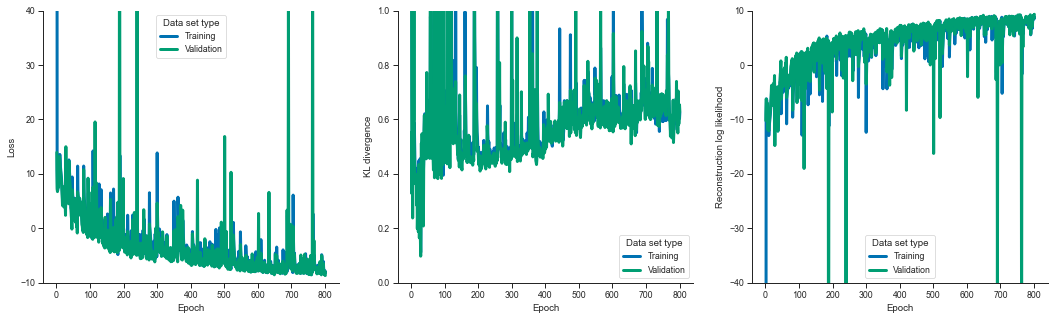

'VRNN_withbiasaddedRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal'

In [3]:
# Add plotting learning curves
modelname = "VRNN_withbiasaddedRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
summary_models = SummaryModels(file_name)
summary_models.model_name = modelname
df = summary_models.load_curves_df("withbiasadded")
summary_models.plot_curves(df, ylims=[(-10, 40), (0, 1), (-40, 10)])
summary_models.model_name

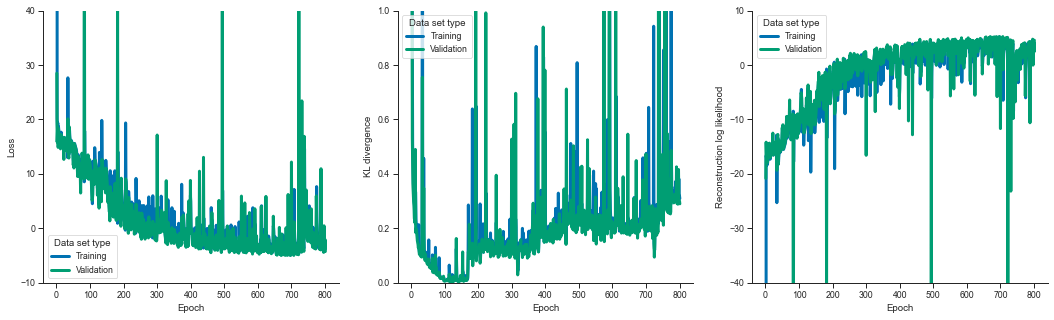

'VRNN_rawspeedcourseRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal'

In [4]:
# Add plotting learning curves
modelname = "VRNN_rawspeedcourseRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
summary_models = SummaryModels(file_name)
summary_models.model_name = modelname
df = summary_models.load_curves_df("rawspeedcourse")
summary_models.plot_curves(df, ylims=[(-10, 40), (0, 1), (-40, 10)])
summary_models.model_name

In [5]:
train = TrainEvaluate(
    file_name,
    is_trained=True,
    trained_model_name=modelname,
    generative_dist=generative_dist,
    use_generative_bias=True,
    first_order_diff=True,
    )

val_results = train.evaluate_loop(train.validation_dataloader, train.validation_n, 1)
#loss_epoch / data_n, 
#kl_epoch / data_n,
#recon_epoch / data_n,
#all_log_px,
#all_lengths,
#all_ship_types,
#all_file_location_indices,
#all_mmsis,
#all_data_set_indices

C:\Github\vessel-trajectory-anomaly-detection\models\saved-models\VRNN_rawspeedcourseRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal.pth


In [6]:
recon_probs = [val_results[3][i]/val_results[4][i] for i in range(len(val_results[3]))]
recon_probs

[6.763508810925839,
 2.8982777913411457,
 -0.1127995746891673,
 5.128640724794708,
 8.311631556919643,
 -0.3327437121458728,
 3.3039423982862015,
 2.997444897163205,
 8.129363558185634,
 3.1314322731711646,
 3.0438360916940788,
 5.549305943080357,
 2.4182562828063965,
 2.5188628748843542,
 3.028627207581426,
 7.822456467319542,
 2.4584540164831914,
 8.322253589898768,
 3.6398004899945176,
 3.005661349826389,
 8.2109375,
 2.9780606611059346,
 7.589104251585145,
 5.480397325880984,
 3.4006403481088032,
 8.214723386964598,
 3.954121770085515,
 2.6828925810664535,
 7.732533629511444,
 8.409038704885564,
 -0.4750339580032061,
 7.412822476393885,
 2.897712154664855,
 3.1793621608189175,
 8.085248613690997,
 7.876070462740385,
 0.2304873916338075,
 2.970083811926463,
 2.137517025596217,
 7.865052129181338,
 3.327091519794767,
 3.8168547068927303,
 7.793224066076144,
 8.266915583956068,
 8.213495001092657,
 4.13567377446772,
 7.881400954555458,
 7.586770651223776,
 2.9625823974609373,
 0.53479

In [7]:
idx = np.argmin(recon_probs)
idx = 36
print(idx)
print(val_results[3][idx])

36
12.215831756591797


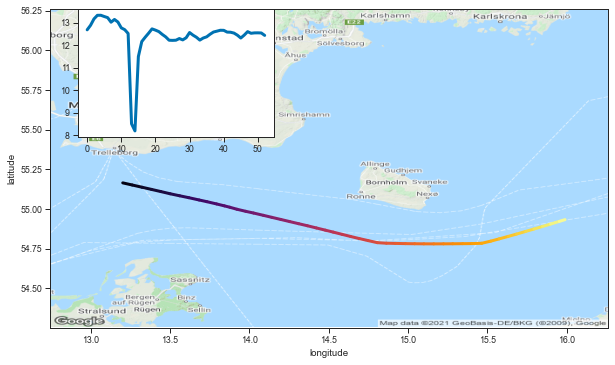

In [8]:
_, _, _, _, _, _, inputs, target = train.validation_set[idx]
start = train.validation_set.get_startpos(idx)[:2]

#track = torch.cat([start.unsqueeze(0), target], dim=0)
#track = torch.cumsum(track, dim=0)

track = torch.cat([start.unsqueeze(0), target[:,:2]], dim=0)
track = torch.cumsum(track, dim=0)
track = torch.cat([track[1:,:], target[:,2:]],dim=1)

printTrack(track, train.project_dir)

16.592798471450806


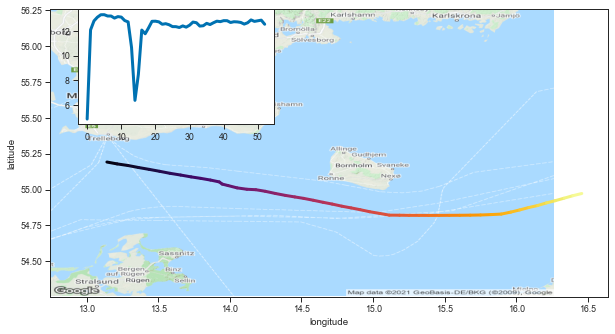

In [9]:
recon = train.track_reconstructions(train.validation_set, idx)
log_prob = recon['Reconstruction log probability']
recon = recon['Reconstruction']

#recon_track = torch.tensor(recon[['Latitude','Longitude','Speed','Course']].values)
#recon_track = torch.cat([start.unsqueeze(0), recon_track], dim=0)
#recon_track = torch.cumsum(recon_track, dim=0)

recon_track = torch.cat([start.unsqueeze(0), torch.tensor(recon[['Latitude','Longitude']].values)], dim=0)
recon_track = torch.cumsum(recon_track, dim=0)
recon_track = torch.cat([recon_track[1:,:], torch.tensor(recon[['Speed','Course']].values)],dim=1)

print(sum(log_prob))
printTrack(recon_track, train.project_dir)

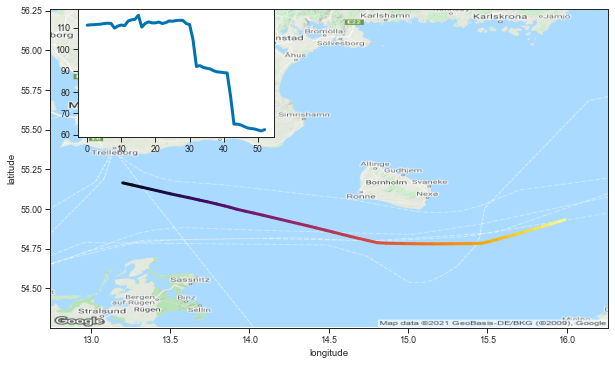

In [10]:
_, _, _, _, _, _, inputs, target = train.validation_set[idx]
start = train.validation_set.get_startpos(idx)[:2]

#track = torch.cat([start.unsqueeze(0), target], dim=0)
#track = torch.cumsum(track, dim=0)

track = torch.cat([start.unsqueeze(0), target[:,:2]], dim=0)
track = torch.cumsum(track, dim=0)
track = torch.cat([track[1:,:], target[:,2:]],dim=1)

printTrack(track, train.project_dir, speed=False)

8.334014654159546


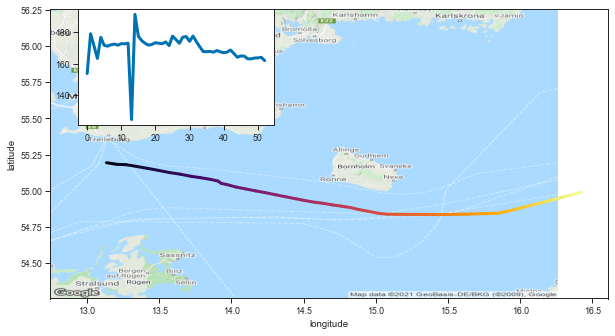

In [11]:
recon = train.track_reconstructions(train.validation_set, idx)
log_prob = recon['Reconstruction log probability']
recon = recon['Reconstruction']

#recon_track = torch.tensor(recon[['Latitude','Longitude','Speed','Course']].values)
#recon_track = torch.cat([start.unsqueeze(0), recon_track], dim=0)
#recon_track = torch.cumsum(recon_track, dim=0)

recon_track = torch.cat([start.unsqueeze(0), torch.tensor(recon[['Latitude','Longitude']].values)], dim=0)
recon_track = torch.cumsum(recon_track, dim=0)
recon_track = torch.cat([recon_track[1:,:], torch.tensor(recon[['Speed','Course']].values)],dim=1)

print(sum(log_prob))
printTrack(recon_track, train.project_dir, speed=False)

In [12]:
print(target)

tensor([[-1.2386e-02,  5.6485e-02,  1.2690e+01,  1.1116e+02],
        [-1.2836e-02,  5.7622e-02,  1.2893e+01,  1.1136e+02],
        [-1.3351e-02,  5.9464e-02,  1.3177e+01,  1.1140e+02],
        [-1.3554e-02,  6.0090e-02,  1.3336e+01,  1.1156e+02],
        [-1.3882e-02,  6.0793e-02,  1.3338e+01,  1.1166e+02],
        [-1.3832e-02,  6.0572e-02,  1.3283e+01,  1.1196e+02],
        [-1.3557e-02,  5.8607e-02,  1.3233e+01,  1.1209e+02],
        [-1.3962e-02,  5.9159e-02,  1.3030e+01,  1.1198e+02],
        [-1.2699e-02,  5.9623e-02,  1.3152e+01,  1.0980e+02],
        [-1.2070e-02,  5.8087e-02,  1.3039e+01,  1.1078e+02],
        [-1.4290e-02,  6.4236e-02,  1.2778e+01,  1.1125e+02],
        [-1.0944e-02,  5.0131e-02,  1.2697e+01,  1.1099e+02],
        [-1.4046e-02,  5.9987e-02,  1.2528e+01,  1.1313e+02],
        [-1.2157e-02,  4.9579e-02,  8.5146e+00,  1.1370e+02],
        [-8.4114e-03,  3.3158e-02,  8.1977e+00,  1.1393e+02],
        [-1.2783e-02,  4.5290e-02,  1.1503e+01,  1.1581e+02],
        

In [13]:
print(torch.tensor(recon[['Longitude','Latitude','Speed','Course']].values))

tensor([[-1.6861e-02,  1.6789e-02,  5.1647e+00,  1.5365e+02],
        [ 5.1643e-02, -1.2424e-02,  1.2030e+01,  1.7891e+02],
        [ 7.0946e-02, -1.4120e-02,  1.2779e+01,  1.7121e+02],
        [ 7.5396e-02, -1.1589e-02,  1.2728e+01,  1.6323e+02],
        [ 6.0526e-02, -2.2237e-03,  1.3204e+01,  1.7657e+02],
        [ 7.7137e-02, -1.2863e-02,  1.3358e+01,  1.7150e+02],
        [ 7.4812e-02, -1.3165e-02,  1.3257e+01,  1.7100e+02],
        [ 7.4293e-02, -1.3804e-02,  1.3195e+01,  1.7190e+02],
        [ 7.2656e-02, -1.4255e-02,  1.3014e+01,  1.7231e+02],
        [ 7.5282e-02, -1.1568e-02,  1.3244e+01,  1.7162e+02],
        [ 7.4591e-02, -1.4560e-02,  1.3083e+01,  1.7261e+02],
        [ 6.8093e-02, -1.0014e-02,  1.2784e+01,  1.7249e+02],
        [ 6.7674e-02, -1.1375e-02,  1.2710e+01,  1.7287e+02],
        [ 5.2494e-02, -1.1752e-02,  1.0488e+01,  1.2452e+02],
        [ 2.0579e-02, -1.5486e-02,  6.3585e+00,  1.9117e+02],
        [ 4.1300e-02, -9.1571e-03,  8.4217e+00,  1.7719e+02],
        

In [14]:
recon

,Longitude,Latitude,Speed,Course,Longitude sigma,Latitude sigma,Speed sigma,Course sigma
0,-0.016861,0.016789,5.164744,153.646820,0.042441,0.013433,9.135207,186.534902
1,0.051643,-0.012424,12.030001,178.913467,0.017059,0.007236,0.904348,85.301041
2,0.070946,-0.014120,12.779408,171.210236,0.008683,0.004575,0.158427,80.080108
3,0.075396,-0.011589,12.728256,163.226929,0.012070,0.004289,1.351986,95.812281
4,0.060526,-0.002224,13.204175,176.573608,0.011862,0.006713,0.543709,77.729477
5,0.077137,-0.012863,13.358083,171.499283,0.009827,0.005246,0.219040,80.372193
6,0.074812,-0.013165,13.256926,171.001129,0.010182,0.005118,0.304408,80.555869
7,0.074293,-0.013804,13.195086,171.896790,0.009351,0.005112,0.210970,79.577476
8,0.072656,-0.014255,13.014431,172.305908,0.009876,0.005098,0.309609,77.863641
9,0.075282,-0.011568,13.243897,171.620163,0.010043,0.005431,0.207710,79.676124
